In [53]:
#import libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [54]:
#load data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv',index_col='minute', parse_dates=True).close
df.index = df.index.to_pydatetime()
df.shape

(1478,)

In [55]:
df = pd.DataFrame(df)
df

,close
2017-01-02 09:15:00+05:30,8178.70
2017-01-03 09:15:00+05:30,8188.60
2017-01-04 09:15:00+05:30,8196.55
2017-01-05 09:15:00+05:30,8269.90
2017-01-06 09:15:00+05:30,8247.85
...,...
2022-12-26 09:15:00+05:30,18010.30
2022-12-27 09:15:00+05:30,18136.00
2022-12-28 09:15:00+05:30,18109.25
2022-12-29 09:15:00+05:30,18207.10


In [56]:
#prepare data for training SVR models
_df=df.head(len(df)-1)
_df = pd.DataFrame(_df)
_df.shape

(1477, 1)

In [57]:
_df.head

<bound method NDFrame.head of                               close
2017-01-02 09:15:00+05:30   8178.70
2017-01-03 09:15:00+05:30   8188.60
2017-01-04 09:15:00+05:30   8196.55
2017-01-05 09:15:00+05:30   8269.90
2017-01-06 09:15:00+05:30   8247.85
...                             ...
2022-12-23 09:15:00+05:30  17824.10
2022-12-26 09:15:00+05:30  18010.30
2022-12-27 09:15:00+05:30  18136.00
2022-12-28 09:15:00+05:30  18109.25
2022-12-29 09:15:00+05:30  18207.10

[1477 rows x 1 columns]>

In [58]:
_df.index

DatetimeIndex(['2017-01-02 09:15:00+05:30', '2017-01-03 09:15:00+05:30',
               '2017-01-04 09:15:00+05:30', '2017-01-05 09:15:00+05:30',
               '2017-01-06 09:15:00+05:30', '2017-01-09 09:15:00+05:30',
               '2017-01-10 09:15:00+05:30', '2017-01-11 09:15:00+05:30',
               '2017-01-12 09:15:00+05:30', '2017-01-13 09:15:00+05:30',
               ...
               '2022-12-16 09:15:00+05:30', '2022-12-19 09:15:00+05:30',
               '2022-12-20 09:15:00+05:30', '2022-12-21 09:15:00+05:30',
               '2022-12-22 09:15:00+05:30', '2022-12-23 09:15:00+05:30',
               '2022-12-26 09:15:00+05:30', '2022-12-27 09:15:00+05:30',
               '2022-12-28 09:15:00+05:30', '2022-12-29 09:15:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', length=1477, freq=None)

In [59]:
#independent and dependent data
days = [[0 for j in range(2)] for i in range(len(_df.index))]
close_price=[]

In [60]:
for i in range(len(_df.index)):
    days[i][0]=int(_df.index[i].month)
    days[i][1]=int(_df.index[i].year)
for close in _df.close:
    close_price.append(float(close))

In [61]:
#3 Support Vector Regressor

#using linear kernel
lin_svr=SVR(kernel='linear',C=1000.0)
print(lin_svr.fit(days,close_price))

#using polynomial kernel
poly_svr=SVR(kernel='poly',C=1000.0,degree=2)
print(poly_svr.fit(days,close_price))

#using rbf kernel
rbf_svr=SVR(kernel='rbf',C=1000.0,gamma=0.25)
print(rbf_svr.fit(days,close_price))

SVR(C=1000.0, kernel='linear')
SVR(C=1000.0, degree=2, kernel='poly')
SVR(C=1000.0, gamma=0.25)


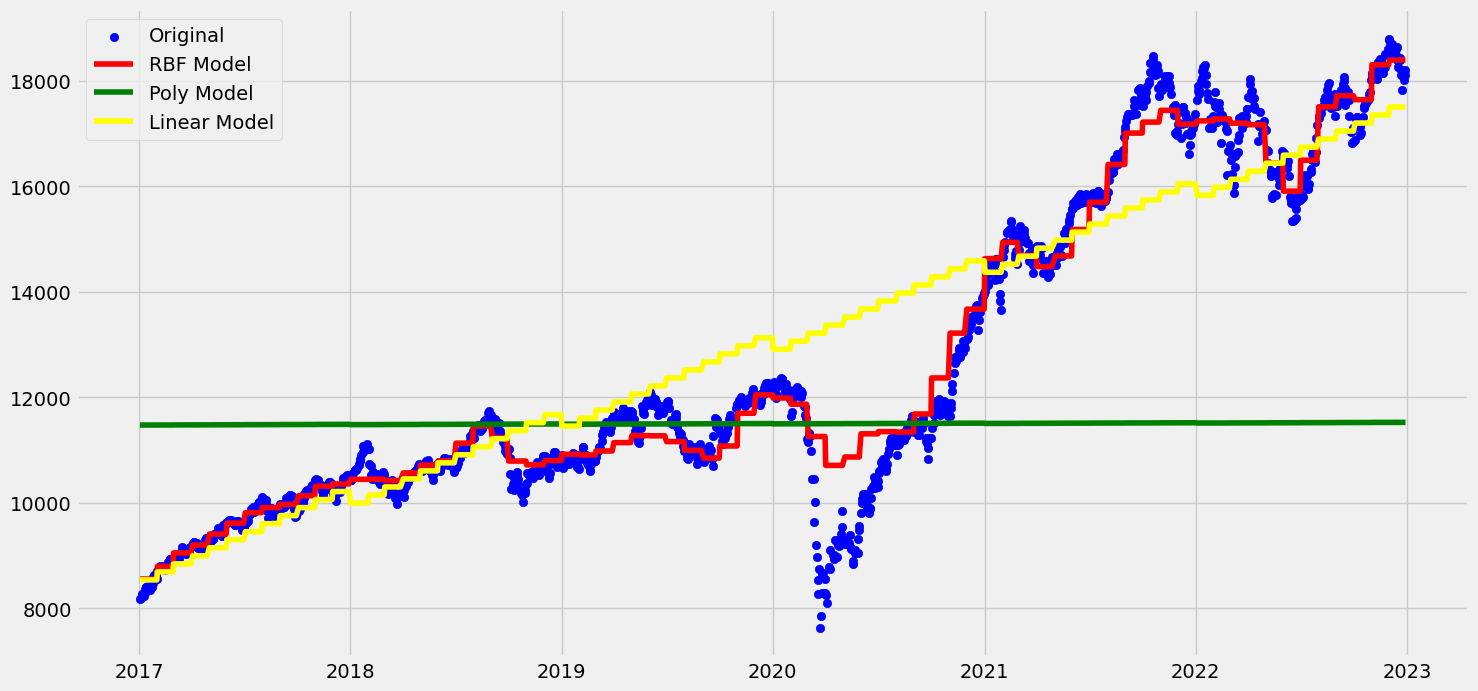

In [62]:
#plot data vs predictions
plt.figure(figsize=(16,8))
plt.scatter(_df.index,close_price,color='blue',label='Original')
plt.plot(_df.index,rbf_svr.predict(days),color='red',label='RBF Model')
plt.plot(_df.index,poly_svr.predict(days),color='green',label='Poly Model')
plt.plot(_df.index,lin_svr.predict(days),color='yellow',label='Linear Model')
plt.legend()
plt.show()